<h1><b>Actividad Semanal -- 6 visualización</b><h1>

**Presentado Por:** 

*   Giovanni Acuña Morales - **A01794007**

**Matería:** Ciencia y analítica de datos

**Profesor:**	Jobish Vallikavungal Devassia 

**Director:** Orlando Figón Cruz

***Noviembre 2 del 2022***

In [63]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

<h2><b>1. Descarga los datos a un sitio externo. y carga el dataset en tu libreta.</b></h2>

In [2]:
url_data_set = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'

df_data_set = pd.read_csv(url_data_set)
df_data_set

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


<h2><b>2. Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()</b></h2>

In [3]:
df_data_set.shape

(30000, 25)

In [4]:
df_data_set.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [5]:
df_data_set.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
df_data_set.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [7]:
df_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [8]:
df_data_set.isna()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<h2><b>3. Limpia los datos eliminando los registros nulos o rellena con la media de la columna</b></h2>

In [9]:
df_data_set.dropna(how = 'any', axis = 0, inplace = True)
df_data_set

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1.0,3.0,1.0,39.0,0.0,0.0,0.0,0.0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29996,29997,150000,1.0,3.0,2.0,43.0,-1.0,-1.0,-1.0,-1.0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29997,29998,30000,1.0,2.0,2.0,37.0,4.0,3.0,2.0,-1.0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29998,29999,80000,1.0,3.0,1.0,41.0,1.0,-1.0,0.0,0.0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


<h2><b>4. Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión</b></h2>

In [10]:
df_data_set.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,...,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,...,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,...,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Con la función **describe()** podemos evidenciar que las medidas de tendencia central indican:


*   **Media:** 
Con la media obtenemos el equivalente del promedio de cada uno de las columnas que están en el dataframe (*df_data_set*) siempre y cuando la data de la columna sea de tipo númerico

In [11]:
df_data_set.median()

ID      15005.5
X1     140000.0
X2          2.0
X3          2.0
X4          2.0
X5         34.0
X6          0.0
X7          0.0
X8          0.0
X9          0.0
X10         0.0
X11         0.0
X12     22379.0
X13     21194.5
X14     20085.5
X15     19037.5
X16     18104.5
X17     17067.5
X18      2100.0
X19      2009.0
X20      1800.0
X21      1500.0
X22      1500.0
X23      1500.0
Y           0.0
dtype: float64

*   **Moda:**
Con la moda obtenemos el valor númerico que más se repite dentro de cada columna del dataframe.

In [12]:
df_data_set.mode()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,50000.0,2.0,2.0,2.0,29.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,29996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29954,29997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29955,29998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29956,29999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*   **Mediana:**
Con la Mediana obtenemos el valor central cuando los datos están acomodados de menor a mayor.

In [13]:
df_data_set.mean()

ID      15005.550504
X1     167555.900928
X2          1.604012
X3          1.853094
X4          1.551739
X5         35.483443
X6         -0.017124
X7         -0.134021
X8         -0.166767
X9         -0.221110
X10        -0.266807
X11        -0.291575
X12     51248.119901
X13     49200.493825
X14     47032.385273
X15     43279.335370
X16     40328.984578
X17     38889.925763
X18      5664.614460
X19      5925.715468
X20      5228.429969
X21      4829.873556
X22      4801.481574
X23      5220.708025
Y           0.221143
dtype: float64

<h2><b>5. Realiza el conteo de las variables categóricas</b></h2>

Deacuerdo al diccionario del dataset (*dataset_info.txt*), se identificó como variables categóricas las siguientes columnas:


*   **ID:** Almacena el id autoincrementeable del dataframe *data_set*
*   **X2:** Almacena el género del usuario:  (Masculino = 1, Femenino = 2)
*   **X3:** Almacena el nivel de educación: (Escuela = 1, Universidad = 2, Preparatoria = 3, Otros = 4). 
*   **X4:** Estado civil (Casado = 1, Soltero = 2, Otro = 3)
*   **X5:** Edad.
*   **Y:** Si fue otrogado el crédito (Si = 1, No = 0)

In [14]:
df_data_set[['ID', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y']].describe()

,ID,X2,X3,X4,X5,X6,X7,X8,X9,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,0.221143
std,8654.547473,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,0.415023
min,1.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000
25%,7516.250000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,15005.500000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22497.750000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,1.000000


<h2><b>6. Escala los datos</b></h2>

Lo que se realizará es escalar los datos a las columnas que no son categorícas, mencionado en el punto anterior.

Para eso primero excluimos las columas categorícas.

In [15]:
print(df_data_set[df_data_set.columns.difference(['ID', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'])])

           X1  X10  X11       X12       X13       X14      X15      X16  \
0       20000 -2.0 -2.0    3913.0    3102.0     689.0      0.0      0.0   
1      120000  0.0  2.0    2682.0    1725.0    2682.0   3272.0   3455.0   
2       90000  0.0  0.0   29239.0   14027.0   13559.0  14331.0  14948.0   
3       50000  0.0  0.0   46990.0   48233.0   49291.0  28314.0  28959.0   
4       50000  0.0  0.0    8617.0    5670.0   35835.0  20940.0  19146.0   
...       ...  ...  ...       ...       ...       ...      ...      ...   
29995  220000  0.0  0.0  188948.0  192815.0  208365.0  88004.0  31237.0   
29996  150000  0.0  0.0    1683.0    1828.0    3502.0   8979.0   5190.0   
29997   30000  0.0  0.0    3565.0    3356.0    2758.0  20878.0  20582.0   
29998   80000  0.0 -1.0   -1645.0   78379.0   76304.0  52774.0  11855.0   
29999   50000  0.0  0.0   47929.0   48905.0   49764.0  36535.0  32428.0   

           X17      X18      X19      X20     X21      X22     X23  
0          0.0      0.0    689

Ahora obtendremos el valor máximo y mínimio en cada componente o columna.

In [16]:
df_data_set[df_data_set.columns.difference(['ID', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'])].abs().idxmax()

X1      2197
X10     8654
X11     1894
X12     2197
X13     2197
X14     5296
X15     2197
X16     2197
X17     2197
X18    28716
X19     5296
X20     2197
X21    28716
X22    28037
X23      506
dtype: int64

In [17]:
df_data_set[df_data_set.columns.difference(['ID', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'])].abs().idxmin()

X1     42
X10     1
X11     2
X12     9
X13     9
X14     9
X15     0
X16     0
X17     0
X18     0
X19     8
X20     0
X21     0
X22     0
X23     0
dtype: int64

Y escalamos las columnas restantes:

In [38]:
scaler = MinMaxScaler()
df_scaler = pd.DataFrame(scaler.fit_transform(df_data_set[df_data_set.columns.difference(['ID', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'Y'])]), columns = ['X1','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23'])
df_scaler

,X1,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.010101,0.0,0.0,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.2,0.4,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.2,0.2,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.2,0.2,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.2,0.2,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,0.212121,0.2,0.2,0.313716,0.249208,0.200746,0.243036,0.111622,0.273259,0.009730,0.011875,0.005583,0.004907,0.011723,0.001892
29954,0.141414,0.2,0.2,0.148008,0.067955,0.088267,0.168596,0.085794,0.260979,0.002103,0.002094,0.010042,0.000208,0.000000,0.000000
29955,0.020202,0.2,0.2,0.149674,0.069405,0.087859,0.179805,0.101057,0.275854,0.000000,0.000000,0.024552,0.006763,0.004689,0.005864
29956,0.070707,0.2,0.1,0.145064,0.140604,0.128239,0.209850,0.092403,0.298591,0.098334,0.002024,0.001315,0.003101,0.124174,0.003412


<h2><b>7. Reduce las dimensiones con PCA.</b></h2>

In [39]:
pcs = PCA()
# pca.fit_transform(df_scaler[numericas])
pcs.fit_transform(preprocessing.scale(df_scaler.iloc[:,:].dropna(axis = 0)))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                          'Proportion of variance': pcs.explained_variance_ratio_,
                          'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)
                              })
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.46,1.47,1.18,0.95,0.94,0.93,0.88,0.85,0.79,0.51,0.42,0.27,0.2,0.16,0.15
Proportion of variance,0.40,0.14,0.09,0.06,0.06,0.06,0.05,0.05,0.04,0.02,0.01,0.00,0.0,0.00,0.00
Cumulative proportion,0.40,0.55,0.64,0.70,0.76,0.82,0.87,0.92,0.96,0.98,0.99,0.99,1.0,1.00,1.00


**Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%**

In [20]:
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
Standard deviation,2.4592,1.4708,1.1820,0.9515,0.9404,0.9346,0.8842,0.8523,0.7907,0.5071,0.4223,0.2657,0.2025,0.1592,0.1525
Proportion of variance,0.4032,0.1442,0.0931,0.0604,0.0590,0.0582,0.0521,0.0484,0.0417,0.0171,0.0119,0.0047,0.0027,0.0017,0.0015
Cumulative proportion,0.4032,0.5474,0.6405,0.7009,0.7598,0.8181,0.8702,0.9186,0.9603,0.9774,0.9893,0.9940,0.9968,0.9985,1.0000


Indica la importancia de las variables en el primer componente principal podemos ver varios han superado con exito la varianza del **70%** de la variación total de los datos originales, mientras que el segundo explica un promedio del **20%**. Conjuntamente, los dos componentes principales explican alrededor del **90%** de la variación total, un porcentaje bastante elevado. 

<h2><b>8. Elabora los histogramas de los atributos para visualizar su distribución.</b></h2>

In [45]:
componente = pd.DataFrame(data = (pcs.components_.T), columns=[f'PC{i+1}' for i in range(len(pcsSummary_df.columns))])
componente

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0.145670,0.396194,-0.124271,-0.100707,-0.005576,-0.078826,0.115503,0.069585,-0.877734,0.031697,-0.007859,-0.007148,0.015846,-0.000963,0.003333
1,0.122885,-0.507767,0.387294,-0.102351,-0.074385,-0.009525,0.048391,-0.004904,-0.233865,0.125608,-0.697258,0.041167,0.016065,-0.001651,-0.003963
2,0.126741,-0.498442,0.399222,-0.115484,0.007885,-0.060812,-0.012658,0.002082,-0.249674,-0.004538,0.703015,-0.044880,-0.015441,0.000074,0.003611
3,0.367941,-0.045244,-0.217831,-0.020051,-0.029704,-0.048920,0.003848,0.007778,0.086643,0.553001,0.071182,0.415648,-0.431631,-0.183653,-0.316526
4,0.379194,-0.045611,-0.183373,0.058232,-0.060152,-0.036301,-0.038909,-0.136106,0.070515,0.374307,0.044208,0.035615,0.345538,0.328932,0.645171
5,0.384548,-0.031033,-0.117133,0.100591,-0.113887,0.082060,-0.127619,0.096359,0.054054,0.111897,-0.000192,-0.487967,0.492552,-0.086174,-0.527691
6,0.388878,-0.041407,-0.091360,0.091711,-0.015918,0.020510,0.123022,0.035673,0.055403,-0.212851,-0.055786,-0.518245,-0.491909,-0.361900,0.346712
7,0.386375,-0.040873,-0.069647,0.029411,0.134421,-0.064436,-0.007073,0.045654,0.038187,-0.424301,-0.050553,0.072037,-0.248701,0.718852,-0.226136
8,0.378477,-0.032930,-0.067225,-0.106209,0.125492,0.098206,0.007664,-0.009117,0.045273,-0.494988,-0.010821,0.512510,0.341384,-0.427621,0.071326
9,0.128343,0.239727,0.346534,0.403678,-0.157944,0.027352,-0.213156,-0.741288,-0.057959,-0.052867,-0.000109,0.047722,-0.069206,-0.044790,-0.084571


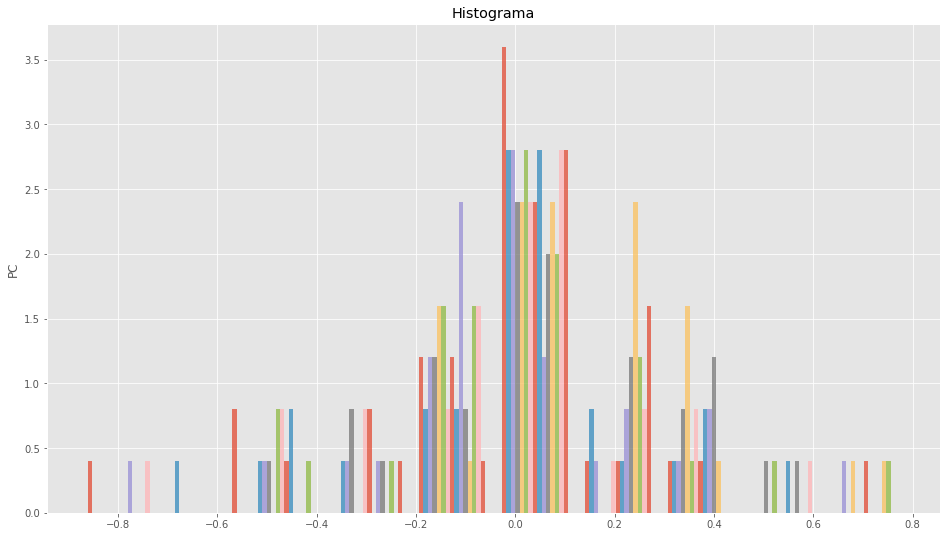

In [62]:
plt.figure(figsize=(16, 9))
plt.title('Histograma')
plt.ylabel('PC')
plt.hist(componente, density=True, alpha=0.75)
plt.show() 

<h2><b>9. Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.</b></h2>

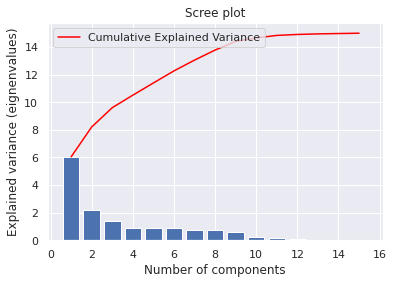

In [70]:
#plot
sns.set() # Bar plot of explained_variance
plt.bar( range(1,len(pcs.explained_variance_)+1), pcs.explained_variance_ )
plt.plot( range(1,len(pcs.explained_variance_ )+1), np.cumsum(pcs.explained_variance_), c='red', label='Cumulative Explained Variance')
plt.legend(loc='upper left')
plt.xlabel('Number of components')
plt.ylabel('Explained variance (eignenvalues)')
plt.title('Scree plot')
plt.show() 

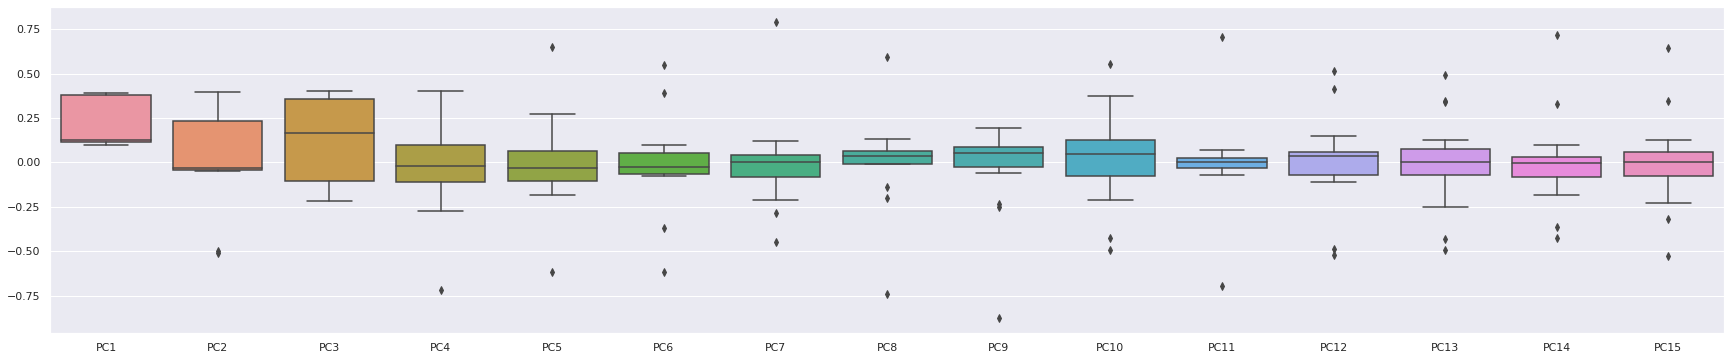

In [72]:
# boxplot
plt.figure(figsize = (30, 6))
sns.boxplot(data = componente, width = 0.8)
plt.show()

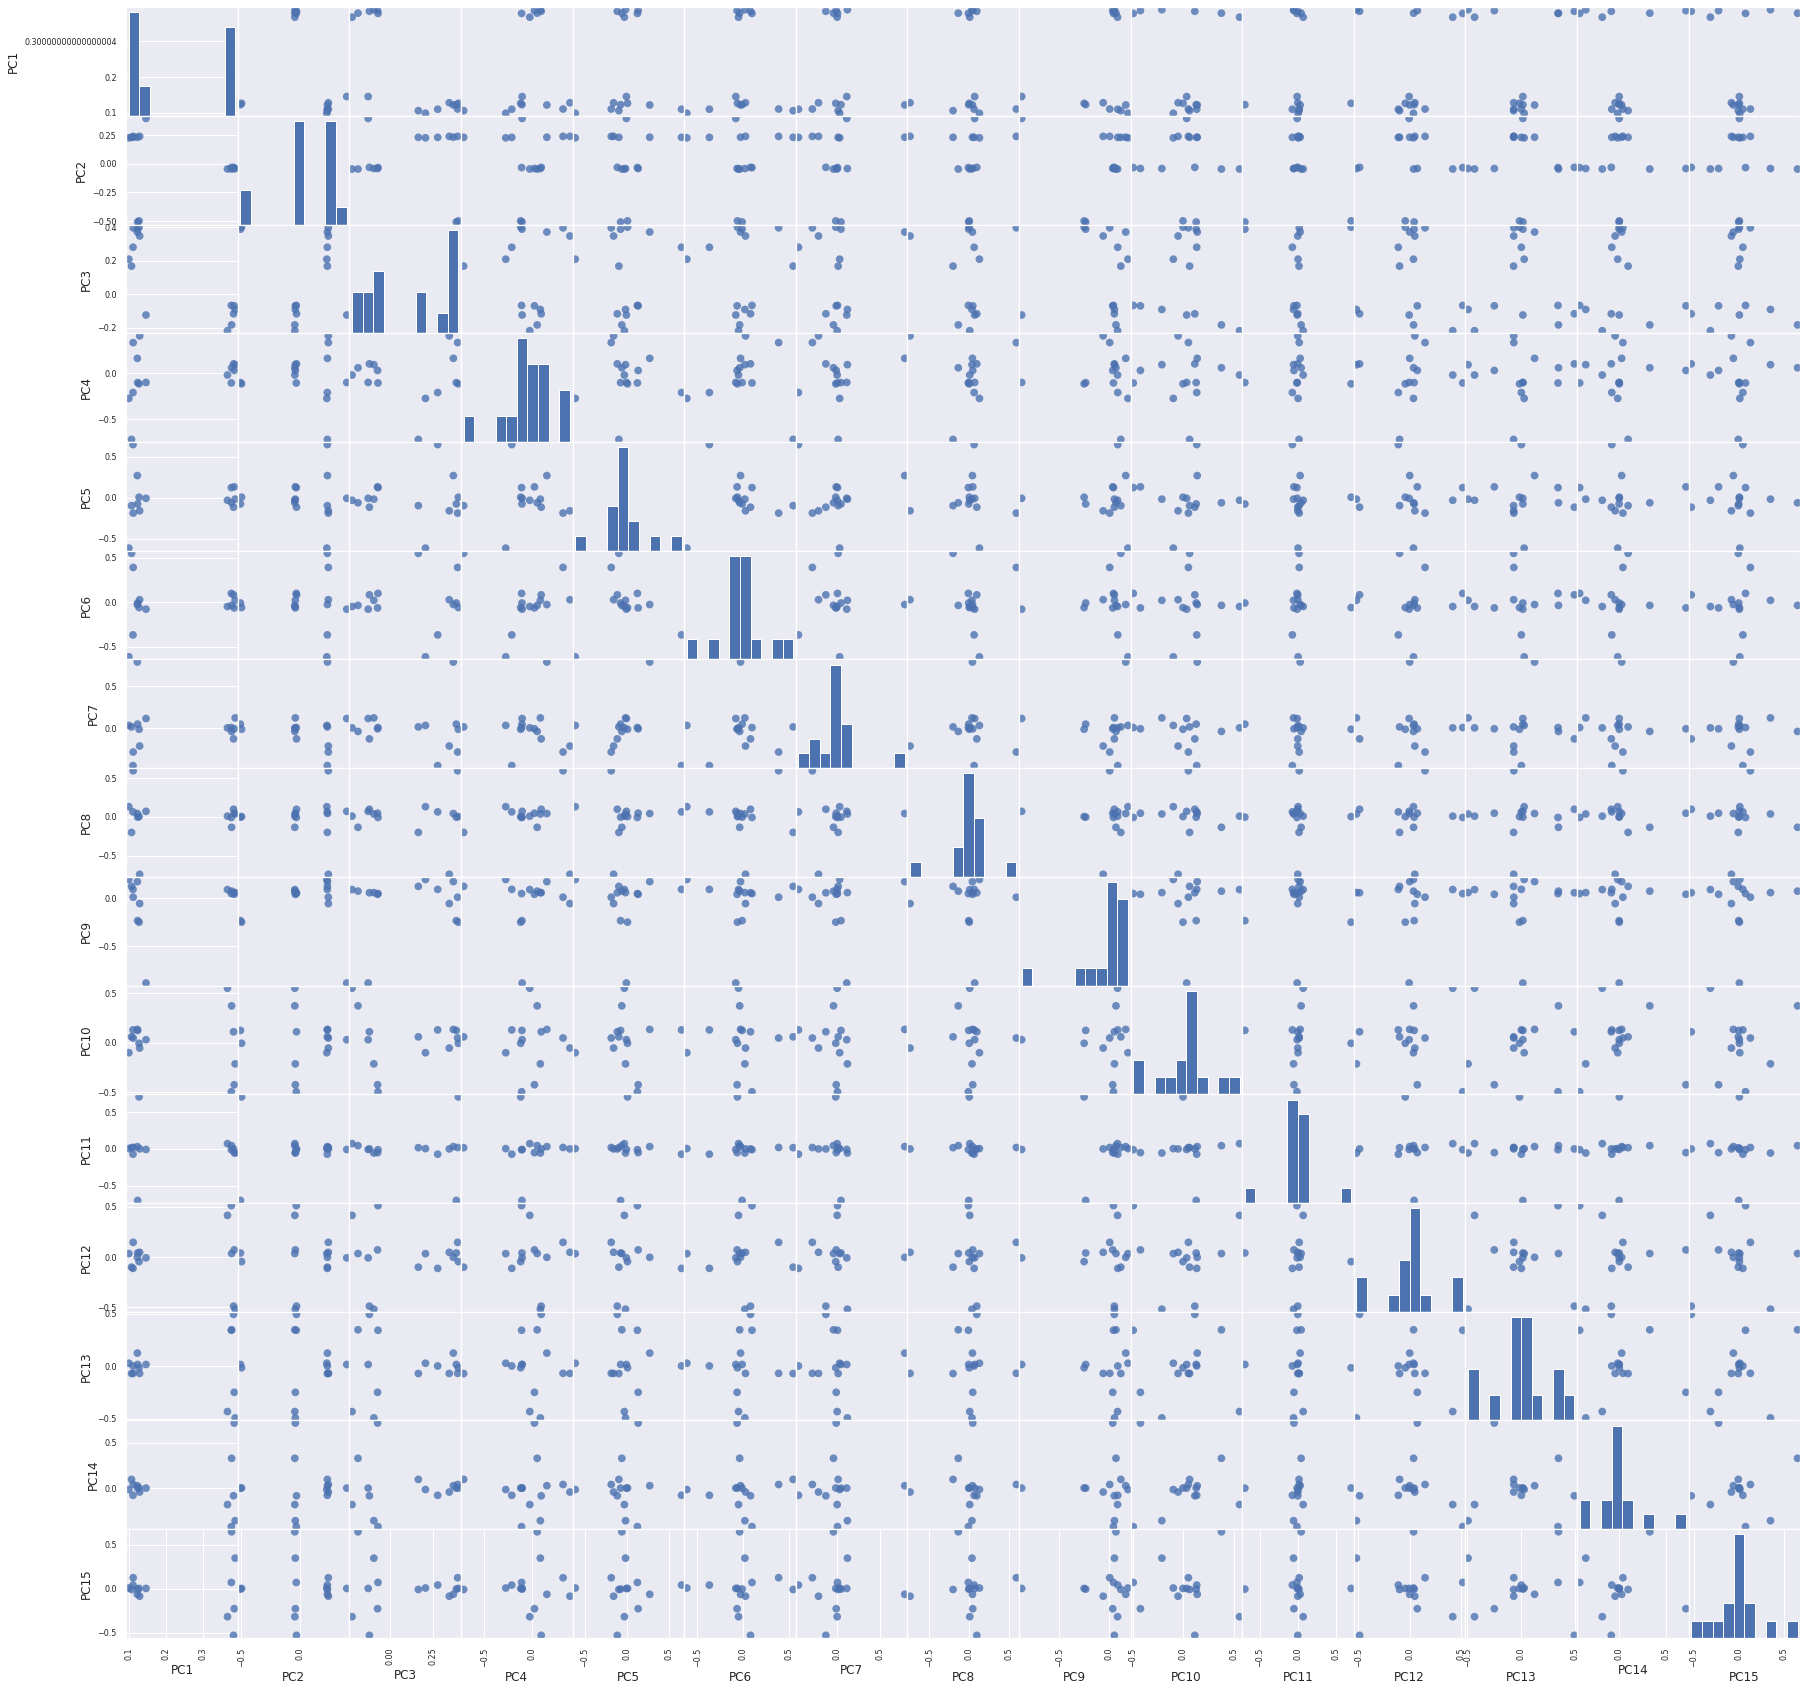

In [76]:
# pairplot
g = pd.plotting.scatter_matrix(componente, figsize=(30,30), marker = 'o', hist_kwds = {'bins': 20}, s = 60, alpha = 0.8)
plt.show()

<h2><b>Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.</b></h2>

***Grafica plot***

En esta gráfica podemos evidenciar el número de componentes y la variancia en el transcurso de toda la data por lo que se puede ver como es similar las barras que representa el valor de varianza con la curvatuta (marcada con la línea roja).

***Gráfica boxplot***

En esta gráfica se puede ver con más detalle cada valor marcada en cada caja con su color único donde se puede evidenciar la varianza y su sesgo en cada cuadro marcada con la línea dentro del mismo.

***Gráfica pairplot***

En esta gráfica podemos ver de cada uno de los valores en su forma de matriz y podemos ver su correlacción el cual atravieza perpenticularmente la matriz.